In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [2]:
# MLP structure

L = 3

dim = np.zeros((L+1,))

dim[0] = 5
dim[1] = 5
dim[2] = 5
dim[3] = 5
#dim[4] = 7
#dim[5] = 8
#dim[6] = 9
#dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [3]:
# draw random parameters, test generating the matrix and reverting back to parameters 


tZL = np.random.normal(0,1,(dim[L],))
phi = np.random.normal(0,1,(L-2,))
ttphi = np.random.normal(0,1,(L-1,))
tPhi1 = np.random.normal(0,1,(dim[0],1))
tPhiL = np.random.normal(0,1,(dim[L],1))
PHI1 = np.random.normal(0,1,(dim[0],dim[0]))
PHI1 = PHI1 + PHI1.T
PHIL = np.random.normal(0,1,(dim[L],dim[L]))
PHIL = PHIL + PHIL.T
ttPHIL = np.random.normal(0,1,(dim[L],dim[L]))
ttPHIL = ttPHIL + ttPHIL.T
PSI1 = []
if L==2:
    PSI1 = np.random.normal(0,1,(dim[0],dim[2]))
    


meang = sm.par2mean(L,dim,tZL)
covg = sm.par2cov(L,dim,phi,ttphi,tPhi1,tPhiL,PHI1,PSI1,PHIL,ttPHIL)


tZLest = sm.mean2par(L,dim,meang)
phiest,ttphiest,tPhi1est,tPhiLest,PHI1est,PSI1est,PHILest,ttPHILest = sm.cov2par(L,dim,covg)

evl, evc = np.linalg.eigh(covg)
covg = (evc * np.abs(evl)) @ evc.T


In [ ]:

plt.plot(meang)
plt.xlabel('parameter index')
plt.xlabel('mean gradient')
plt.show()

plt.imshow(covg)
#plt.clim((-10,10))
plt.clim((-1.5,1.5))
cb=plt.colorbar(format='%1.0e')
cb.ax.tick_params(labelsize=20)

#plt.xticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5],labels=None)
#plt.yticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5],labels=None)
#plt.tick_params(axis='both',direction='out',length=50,width=2,labelcolor='w')

#plt.xticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5, 84.5, 89.5],labels=None)
#plt.yticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5, 84.5, 89.5],labels=None)
#plt.tick_params(axis='both',direction='out',length=30,width=2,labelcolor='w')

fig = plt.gcf()
fig.set_size_inches(15, 15)
#plt.savefig('cov_Tanh_5555_theory.pdf')
#plt.savefig('cov_Tanh_555_theory.pdf')
plt.show()




#plt.plot(meang,meangest,linestyle='none',marker='.')
#plt.plot([np.min(meang), np.max(meang)],[np.min(meang), np.max(meang)])
#plt.show()

#plt.plot(covg,covgest,linestyle='none',marker='.')
#plt.plot([np.min(covg), np.max(covg)],[np.min(covg), np.max(covg)])
#plt.show()



print(tZL)
print('\n')
print(tZLest)
print('\n')
print(phi)
print('\n')
print(phiest)
print('\n')
print(ttphi)
print('\n')
print(ttphiest)
print('\n')
print(tPhi1)
print('\n')
print(tPhi1est)
print('\n')
print(tPhiL)
print('\n')
print(tPhiLest)
print('\n')
print(PHI1)
print('\n')
print(PHI1est)
print('\n')
print(PSI1)
print('\n')
print(PSI1est)
print('\n')
print(PHIL)
print('\n')
print(PHILest)
print('\n')
print(ttPHIL)
print('\n')
print(ttPHILest)



In [ ]:
# eigenvalues and eigenvectors of the generated matrix

evl, evc = np.linalg.eigh(covg)

plt.plot(evl,marker='.')
plt.xlabel('index')
plt.ylabel('eigenvalues')
plt.show()

plt.imshow(evc)
plt.colorbar()
plt.show()


In [ ]:

# fit a random matrix

npar = 0
for iL in np.arange(0,L):
    npar = npar + (dim[iL]+1) * dim[iL+1]
npar = npar.astype(int)

covgrand = np.random.normal(0,1,(npar,npar))

phi,ttphi,tPhi1,tPhiL,PHI1,PSI1,PHIL,ttPHIL = sm.cov2par(L,dim,covgrand)

covg = sm.par2cov(L,dim,phi,ttphi,tPhi1,tPhiL,PHI1,PSI1,PHIL,ttPHIL)






In [ ]:

plt.imshow(covg)
#plt.clim((-0.15,0.15))
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.colorbar()
plt.show()


In [ ]:
# eigenvalues and eigenvectors of the generated matrix

evl, evc = np.linalg.eigh(covg)

plt.plot(evl,marker='.')
plt.xlabel('index')
plt.ylabel('eigenvalues')
plt.show()

plt.imshow(evc)
plt.colorbar()
plt.show()

In [ ]:

print(evl)


### Surrogate

In [4]:

dim0 = np.copy(dim)
for iL in np.arange(1,L):
    dim0[iL] = 1

covg_big = sm.par2cov(L,dim,phi,ttphi,tPhi1,tPhiL,PHI1,PSI1,PHIL,ttPHIL)
evl_big, evc_big = np.linalg.eigh(covg_big)
covg_big = (evc_big * np.abs(evl_big)) @ evc_big.T

covg_small = sm.par2cov(L,dim0,phi,ttphi,tPhi1,tPhiL,PHI1,PSI1,PHIL,ttPHIL)
evl_small, evc_small = np.linalg.eigh(covg_small)
covg_small = (evc_small * np.abs(evl_small)) @ evc_small.T


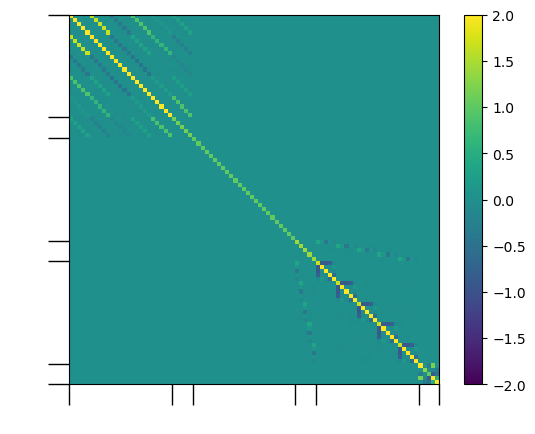

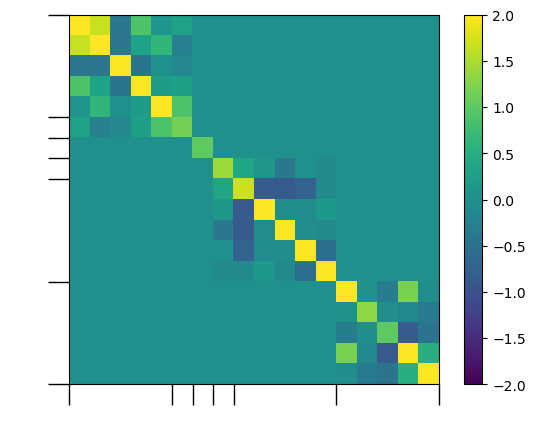

In [9]:

plt.imshow(covg_big)
plt.clim((-2.,2.))
plt.colorbar()

#plt.xticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5],labels=None)
#plt.yticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5],labels=None)
#plt.tick_params(axis='both',direction='out',length=15,width=1,labelcolor='w')
#plt.savefig('matrix_big_Tanh_555.pdf')

plt.xticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5, 84.5, 89.5],labels=None)
plt.yticks(ticks=[-0.5, 24.5, 29.5, 54.5, 59.5, 84.5, 89.5],labels=None)
plt.tick_params(axis='both',direction='out',length=15,width=1,labelcolor='w')
#plt.savefig('matrix_big_Tanh_5555.pdf')

plt.show()

plt.imshow(covg_small)
plt.clim((-2.,2.))
plt.colorbar()

#plt.xticks(ticks=[-0.5, 4.5, 5.5, 10.5, 15.5],labels=None)
#plt.yticks(ticks=[-0.5, 4.5, 5.5, 10.5, 15.5],labels=None)
#plt.tick_params(axis='both',direction='out',length=15,width=1,labelcolor='w')
#plt.savefig('matrix_small_Tanh_555.pdf')

plt.xticks(ticks=[-0.5, 4.5, 5.5, 6.5, 7.5, 12.5, 17.5],labels=None)
plt.yticks(ticks=[-0.5, 4.5, 5.5, 6.5, 7.5, 12.5, 17.5],labels=None)
plt.tick_params(axis='both',direction='out',length=15,width=1,labelcolor='w')
#plt.savefig('matrix_small_Tanh_5555.pdf')

plt.show()


In [10]:

evl_big, evc_big = np.linalg.eigh(covg_big)

evl_small, evc_small = np.linalg.eigh(covg_small)


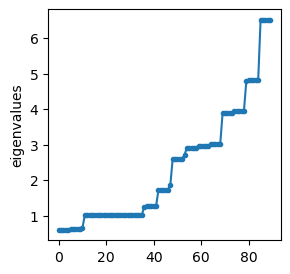

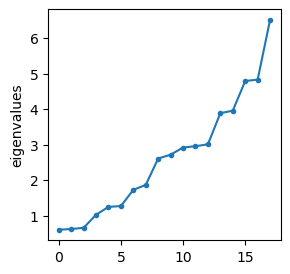

In [11]:

plt.plot(evl_big,marker='.')
plt.ylabel('eigenvalues')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(3, 3)
#plt.savefig('eigenvalues_big_Tanh_555.pdf',bbox_inches="tight")
#plt.savefig('eigenvalues_big_Tanh_5555.pdf',bbox_inches="tight")
plt.show()

plt.plot(evl_small,marker='.')
plt.ylabel('eigenvalues')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(3, 3)
#plt.savefig('eigenvalues_small_Tanh_555.pdf',bbox_inches="tight")
#plt.savefig('eigenvalues_small_Tanh_5555.pdf',bbox_inches="tight")
plt.show()




#print(evl_big)
#print(evl_small)
